# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Time-series-clustering-exercise" data-toc-modified-id="Time-series-clustering-exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time series clustering exercise</a></div><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></div><div class="lev3 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev3 toc-item"><a href="#Standardizing" data-toc-modified-id="Standardizing-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Standardizing</a></div><div class="lev1 toc-item"><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering with K-Means</a></div><div class="lev3 toc-item"><a href="#Figure-1:" data-toc-modified-id="Figure-1:-301"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Figure 1:</a></div><div class="lev3 toc-item"><a href="#Figure-2:" data-toc-modified-id="Figure-2:-302"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Figure 2:</a></div><div class="lev3 toc-item"><a href="#Figure-3:" data-toc-modified-id="Figure-3:-303"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Figure 3:</a></div><div class="lev2 toc-item"><a href="#Comments-on-clustering-of-NYC-business-time-series" data-toc-modified-id="Comments-on-clustering-of-NYC-business-time-series-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comments on clustering of NYC business time series</a></div><div class="lev1 toc-item"><a href="#Agglomerative-clustering" data-toc-modified-id="Agglomerative-clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Agglomerative clustering</a></div><div class="lev3 toc-item"><a href="#Figure-4:" data-toc-modified-id="Figure-4:-401"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Figure 4:</a></div><div class="lev3 toc-item"><a href="#Figure-5:" data-toc-modified-id="Figure-5:-402"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Figure 5:</a></div><div class="lev2 toc-item"><a href="#Comments-on-agglomerative-clustering" data-toc-modified-id="Comments-on-agglomerative-clustering-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comments on agglomerative clustering</a></div><div class="lev2 toc-item"><a href="#Changing-the-number-of-clusters" data-toc-modified-id="Changing-the-number-of-clusters-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Changing the number of clusters</a></div><div class="lev3 toc-item"><a href="#Figure-6:" data-toc-modified-id="Figure-6:-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Figure 6:</a></div><div class="lev3 toc-item"><a href="#Figure-7:" data-toc-modified-id="Figure-7:-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Figure 7:</a></div><div class="lev2 toc-item"><a href="#General-comments-and-conclusions" data-toc-modified-id="General-comments-and-conclusions-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>General comments and conclusions</a></div><div class="lev2 toc-item"><a href="#Smoothing-the-time-series-before-clustering" data-toc-modified-id="Smoothing-the-time-series-before-clustering-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Smoothing the time series before clustering</a></div><div class="lev3 toc-item"><a href="#Figure-9:" data-toc-modified-id="Figure-9:-441"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Figure 9:</a></div><div class="lev3 toc-item"><a href="#Figure-9:" data-toc-modified-id="Figure-9:-442"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Figure 9:</a></div><div class="lev1 toc-item"><a href="#Conclusions:" data-toc-modified-id="Conclusions:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions:</a></div>

# Time series clustering exercise

In [1]:
import pandas as pd
import json
import os
import pylab as pl
import geopandas as gp
import glob
import zipfile
from sklearn.cluster import KMeans
from matplotlib import cm
from descartes import PolygonPatch
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp
import pandas as pd
from pandas.io.common import ZipFile
import pylab as pl


s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
pl.rcParams['font.size'] = 22.
pl.rcParams['font.family'] = 'serif'
pl.rcParams['font.serif'] = ['Times']#Computer Modern Roman']
pl.rcParams['font.weight'] = 'bold'
pl.rcParams['text.usetex'] = True
pl.rcParams['axes.labelsize'] = 20
pl.rcParams['xtick.labelsize'] = 20.
pl.rcParams['ytick.labelsize'] = 18.
pl.rcParams['xtick.major.size']= 10.
pl.rcParams['xtick.minor.size']= 5.
pl.rcParams['ytick.major.size']= 10.
pl.rcParams['ytick.minor.size']= 5.


%pylab inline

ImportError: dlopen(//anaconda/envs/GEOP/lib/python3.6/site-packages/fiona/ogrext.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libfontconfig.1.dylib
  Referenced from: //anaconda/envs/GEOP/lib/libpoppler.78.dylib
  Reason: Incompatible library version: libpoppler.78.dylib requires version 14.0.0 or later, but libfontconfig.1.dylib provides version 13.0.0

# Data

In [2]:
#these commands can be run on the shell and get the data with the command wget
#the cell needs to be run only once
!for ((y=93; y<=99; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

!for ((y=0; y<=1; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=2; y<=9; y+=1)); do wget \
ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=10; y<=14; y+=1)); do wget \
ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done



--2018-12-06 15:26:19--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
           => ‘zbp93totals.zip’
Resolving ftp.census.gov... 148.129.75.35
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Error in server response. Closing.
Retrying.

--2018-12-06 15:31:23--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
  (try: 2) => ‘zbp93totals.zip’
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Error in server response. Closing.
Retrying.

--2018-12-06 15:36:26--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
  (try: 3) => ‘zbp93totals.zip’
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Error in server response. Closing.
Retrying.

--2018-12-06 15:41:33--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
  (try: 4) => ‘zbp93totals.zip’
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Error in server response. Closing.
Retrying.

--2018-12-06 15:46:37--  ftp://ftp.cen

==> SIZE zbp12totals.zip ... 733541
==> PASV ... done.    ==> RETR zbp12totals.zip ... done.
Length: 733541 (716K) (unauthoritative)

zbp12totals.zip     100%[===================>] 716.35K   450KB/s    in 1.6s    

2018-12-06 18:07:40 (450 KB/s) - ‘zbp12totals.zip’ saved [733541]

--2018-12-06 18:07:40--  ftp://ftp.census.gov/econ2013/CBP_CSV/zbp13totals.zip
           => ‘zbp13totals.zip’
Resolving ftp.census.gov... 148.129.75.35
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Error in server response. Closing.
Retrying.

--2018-12-06 18:12:43--  ftp://ftp.census.gov/econ2013/CBP_CSV/zbp13totals.zip
  (try: 2) => ‘zbp13totals.zip’
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /econ2013/CBP_CSV ... done.
==> SIZE zbp13totals.zip ... 733605
==> PASV ... done.    ==> RETR zbp13totals.zip ... done.
Length: 733605 (716K) (unauthoritative)

zbp13totals

In [7]:
#http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/
#0c0e14e9-78e1-404e-97b0-c2fabceb3981
dfs = []
!mv zb*zip {os.getenv("PUIDATA")}

allfiles = np.array(glob.glob(os.getenv("PUIDATA") + "/zb*zip"))



In [3]:
#just one of many whays in which you can get the zipcodes shapefile for NYC
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
!unzip application%2Fzip
!mv ZIP* os.getenv("PUIDATA")


--2017-12-07 07:06:41--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us... 52.206.140.199
Connecting to data.cityofnewyork.us|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2017-12-07 07:06:41--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: 1514401 (1.4M) [application/octet-stream]
Saving to: ‘application%2Fzip’

application%2Fzip   100%[===================>]   1.44M  1.67MB/s    in 0.9s    

2017-12-07 07:06:42 (1.67 MB/s) - ‘application%2Fzip’ saved [1514401/1514401]

Archive:  application%2Fzip
  inflating: ZIP_CODE_040114.shx     
  inflating: ZIP_COD

In [2]:
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

('ZIPCODES:', 248, 'POLYGONS:', 263, 'the difference is due to island with same zip as parts of land,', 'but disjoint shapes')
('number of NYC zip codes:', 263)


In [3]:
#checking types for merging
print("zipcode column type", type(nyczips[0]))

('zipcode column type', <type 'numpy.int64'>)


### Data cleaning

In [4]:
#creating an new array of size Nzips X Nyears to store the data
cbs = np.zeros((len(nyczips), 2014 - 1994))
#creating a date range: 1994-2014
timeline = pd.date_range('1994', '2014', freq='A')
cbs.shape

(263, 20)

In [8]:
#looping over all years i extract the last 2 digits if the year, 
#read in the file with that name (unzipping on the spot)
#into a numpy 2D array cbs i use caps or not caps, depending on the file, 
#to extract ZIP and EST

for j, yy in enumerate(range(1994, 2014)):
    #print (("%d"%yy)[2:])
    print('zbp' + ("%d" % yy)[2:])
    indx = np.array([("%d" % yy)[2:] in allf for allf in allfiles])
    if sum(indx) < 1:
        continue
    f = allfiles[indx][0]

    #allfiles[np.array([("%d"%yy)[2:]
    #                   in allf for allf in allfiles])][0]
    #print f
    zf = zipfile.ZipFile(f)
    df = pd.read_csv(
        zf.open(
            f.replace('.zip', '.txt').replace(os.getenv("PUIDATA") + '/', '')))
    print (df.head())
    if 'ZIP' in df.columns:
        z = 'ZIP'
        est = 'EST'
    else:
        z = 'zip'
        est = 'est'

    for i, zp in enumerate(nyczips):
        try:
            cbs[i][j] = (df[df[z] == zp][est]).get_values()[0]
        except:
            cbs[i][j] = -1

zbp94
    zip         name empflag   emp    qp1      ap  est
0  1001   Agawam, MA     NaN  6198  33601  155158  439
1  1002  Amherst, MA     NaN  6073  28924  127367  450
2  1003  Amherst, MA     NaN    68    367    1604   10
3  1004  Amherst, MA     NaN   210    844    4302   47
4  1005    Barre, MA     NaN   678   3010   13521   92
zbp95
    zip             name empflag   emp    qp1      ap  est
0   501   Holtsville, NY       B     0      0       0    2
1  1000  Springfield, MA     NaN    49    529    2127    4
2  1001       Agawam, MA     NaN  5920  32993  152512  439
3  1002      Amherst, MA     NaN  6153  31645  132699  467
4  1003      Amherst, MA     NaN    89    380    1698   10
zbp96
    zip             name empflag   emp    qp1      ap  est
0   501   Holtsville, NY       B     0      0       0    4
1  1000  Springfield, MA     NaN   161   1494    6671   11
2  1001       Agawam, MA     NaN  6130  37746  171045  433
3  1002      Amherst, MA     NaN  6441  32964  141756  487
4  

In [8]:
# i will look for data rows now. 
# the stanrard clustering packages cannot deal with NaNs
# i am taking the standard deviation row by row in cbs
# if the rows contain NaN the std will be NaN: std(cbs, 1)>0 is False
cleancsb = cbs[std(cbs, 1) > 0]
cleannyczips = np.array(nyczips)[std(cbs, 1) > 0]
badzips = np.where(~(std(cbs, 1) > 0))[0]
np.random.seed(222)

### Standardizing
Important! to perform K-means normally i would whiten the data: standardize along the feature vectors
But for time series each the timeseries is a feature vector itself: we do not want to modify the timestamps seprately. Here, however, I want to cluster on correlated behavior of the variables (the time stamps here) 
We cannot whiten. We will instead normalize and standardize each observation (each zipcode)

In [9]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

print("i expect means of each row to be = 0", vals.mean(1)[:10])
print("i expect stds of each row to be = 1", vals.std(1)[:10])

('i expect means of each row to be = 0', array([ -2.44249065e-16,  -4.66293670e-16,   5.99520433e-16,
         1.11022302e-16,  -2.22044605e-17,   1.77635684e-16,
        -5.99520433e-16,   4.99600361e-16,  -4.44089210e-16,
        -2.22044605e-16]))
('i expect stds of each row to be = 1', array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))


# Clustering with K-Means

In [10]:
# i tried a few options for number of clusters and settled on 5 
#by visual inspection of the clusters and of the variance (silouette plot)
#notice that the random_state is set. That is equivalent to setting the seed, 
#and needed for reproducibility
nc = 5

km = KMeans(n_clusters=nc, random_state=444)

km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=444, tol=0.0001, verbose=0)

cluster centers


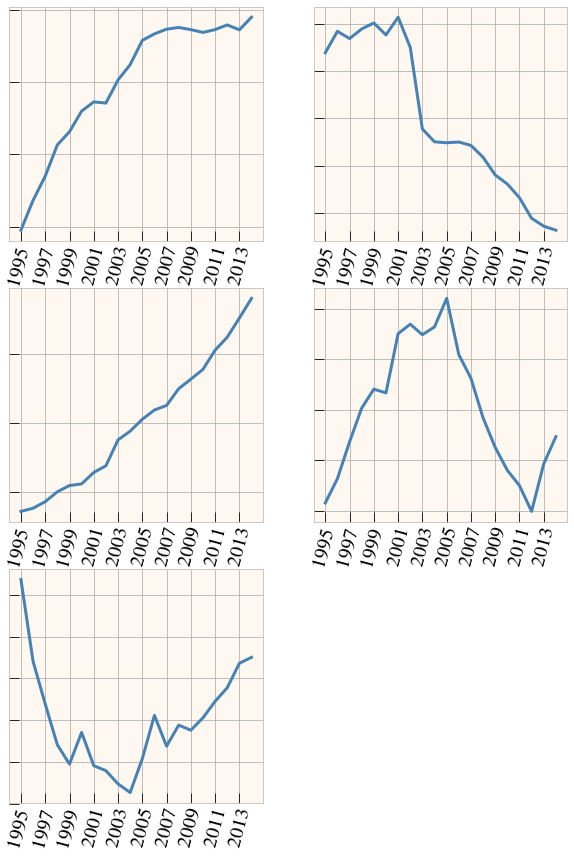

In [11]:
fig = pl.figure(figsize=(10, 25))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))
    ax.plot(timeline, Xc)

    pl.xticks(fontsize=20, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
print("cluster centers")

### Figure 1: 
the cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes

In [12]:
for j in range(5):
    print("zipcodes in cluster", j)
    print(cleannyczips[km.labels_ == j])
    print("\n\n\n\n")

clustersdf = gp.GeoDataFrame()
clustersdf['ZIPCODE'] = cleannyczips
clustersdf['cluster'] = km.labels_

('zipcodes in cluster', 0)
[11230 10466 10040 10473 10024 10025 11357 11360 10128 10023 10028 11102
 10020 10001 10011 10014 10012 11412 10005 11430 11239 11209 10304 10314
 11096 11096 11697 10309 10280 11374 11423 11432 11415 11433 10055 10282
 10112 10278 10286 11371 10119]





('zipcodes in cluster', 1)
[10048 10021 10017 10013 10006 10111 10152 10022 10281 10165 10118 10176
 10122 10107 10103 10166 10169 10172 10270 10110 10151 10173 10178 10121
 10123 10106 10096 10265 10047 10047 10260 10285]





('zipcodes in cluster', 2)
[11436 11213 11212 11225 11218 11226 11219 11210 11204 10467 10463 10475
 10469 10468 10463 10458 10034 10033 10462 10453 10465 10461 10457 10460
 10032 10452 10456 10472 10031 10039 10459 10451 10030 10027 10474 10455
 10037 10454 10026 10035 10029 11356 11359 11105 11354 11370 11358 11362
 10044 11369 11103 11106 11368 11377 11355 11101 11364 10018 11104 11109
 11367 10003 11222 10002 11378 10009 11237 11385 11206 11251 10004 11411
 11201 10004 11205 11208

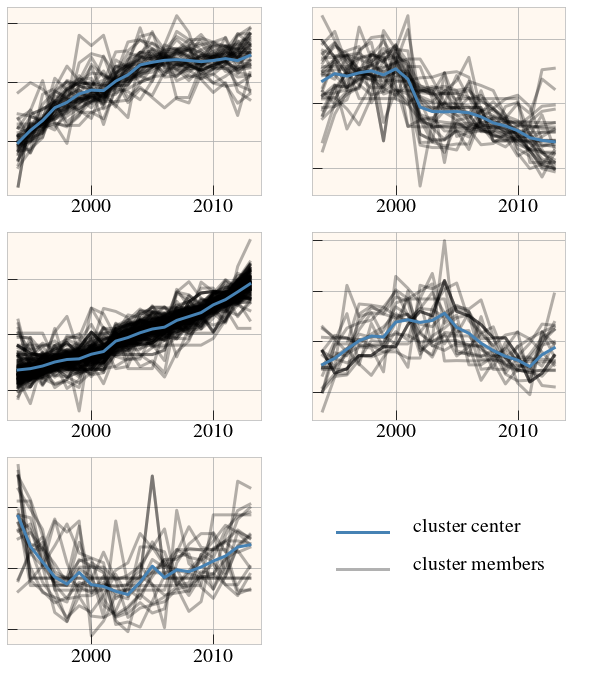

In [13]:
fig = pl.figure(figsize=(10, 20))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)

    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, lw=3)
    pl.xticks(fontsize=20)
    ax.set_xlim(1993.1, 2013.9)
ax = fig.add_subplot(5, 2, i + 2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.1, 0.3], [0.4, 0.4], 'k-', alpha=0.3)
ax.plot([0.1, 0.3], [0.6, 0.6], '-')
ax.text(0.4, 0.6, "cluster center", fontsize=20)
ax.text(0.4, 0.4, "cluster members", fontsize=20)
tmp = ax.axis('off')

### Figure 2: 
the cluster centers and all cluster members for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes

In [14]:
#adding postal codes to notebook
nyczipsshp.ZIPCODE = nyczipsshp.ZIPCODE.astype(int)
print("zipcodes dataframe:", nyczipsshp.columns)
print("clusters dataframe:", clustersdf.columns)

('zipcodes dataframe:', Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
         u'geometry'],
      dtype='object'))
('clusters dataframe:', Index([u'ZIPCODE', u'cluster'], dtype='object'))


In [15]:
#i end up with a lower number of postal codes in the merged df
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

('length of dataframes:', 304, 245, 248)


//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


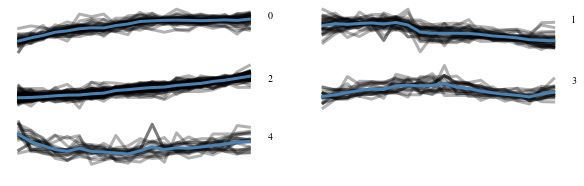

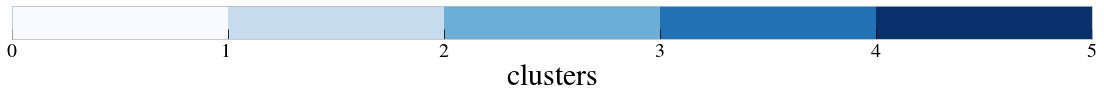

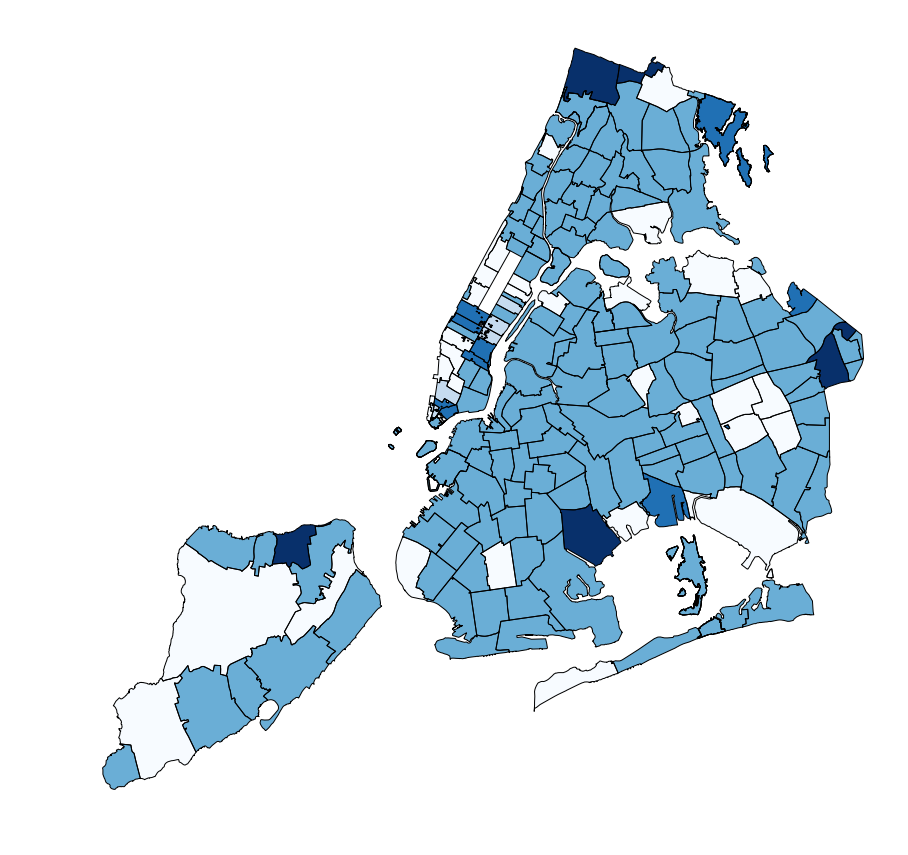

In [16]:
fig = pl.figure(figsize=(10, 5))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    pl.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, lw=3)
    pl.grid(False)
    pl.axis('off')
fig = pl.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar. 
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = pl.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', colormap='Blues', alpha=1, axes=ax)
tmp = ax.axis('off')

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

## Comments on clustering of NYC business time series
there are 2 upword trends indicating economic growth: one that is increasing at constant rate (cluster 2) to which most of NYC belongs, and one which flattens in 2005 (0) which includes  a number of ZIPs spread out through the boroughs: SI, the Rockaways, Queens, Upper West Side. 

There is 1 cluster with a downward developement trend, as measured bby the number of businesses, (1) the financial district, as well as ZIPs in mid town: they have lost business. 

The remaining two cluster show initial loss of businesses followed by growth (4, notably the Bronx west portion) and early growth followed by business loss (1): a zipcode in the financial district and a few midtown ones.

Of course this is only a proxy for echonomic growth, and a poor one for sure: this does not weight differently large and small businesses, so if a large company (e.g. Google) were to open, and take a large portion of a zip code, this would not be interpreted as echonomic growth since it is only one establishment. 

The choice of 5 clusters is relatively arbitraty (i did some testing on the slope of the variance as a function of number of cluters and that is not a robust metric. Personally I prefer using PCA to indicate the number of clusters that should be chosen - http://ieeexplore.ieee.org/document/1374274/) but the clusters seem farily tight despite the large scatter in each time series. Since K-means is not a deterministic algorithm, I ran it several times to see if a different starting point (initial centers) would lead to a different clustering, and the clustering seems in fact stable. 

Since K-means is not a particularly sophisticated algorithm, and I do not have a very large dataset, I can certainly afford to test with another algorithm. I will use hierarchical agglomerative clustering. 

# Agglomerative clustering

In [17]:
#creating centroid points for each zip
xs = nyczipsshp['geometry'].centroid.apply(lambda i: i.x)
ys = nyczipsshp['geometry'].centroid.apply(lambda i: i.y)
xlim = [xs.min() - 0.1 * (xs.max() - xs.min()), xs.max() + 0.1 * (xs.max() -
                                                                  xs.min())]
ylim = [ys.min() - 0.1 * (ys.max() - ys.min()), ys.max() + 0.1 * (ys.max() -
                                                                  ys.min())]

In [18]:
#here i am finding the range of distances in my 
#dataset and setting limits for plots based on that
dx = xlim[1] - xlim[0]
dy = ylim[1] - ylim[0]
if dx>dy:
    ylim[0] -= 0.5 * (dx - dy)
    ylim[1] += 0.5 * (dx - dy)
else:
    xlim[0] -= 0.5 * (dy - dx)
    xlim[1] += 0.5 * (dy - dx)



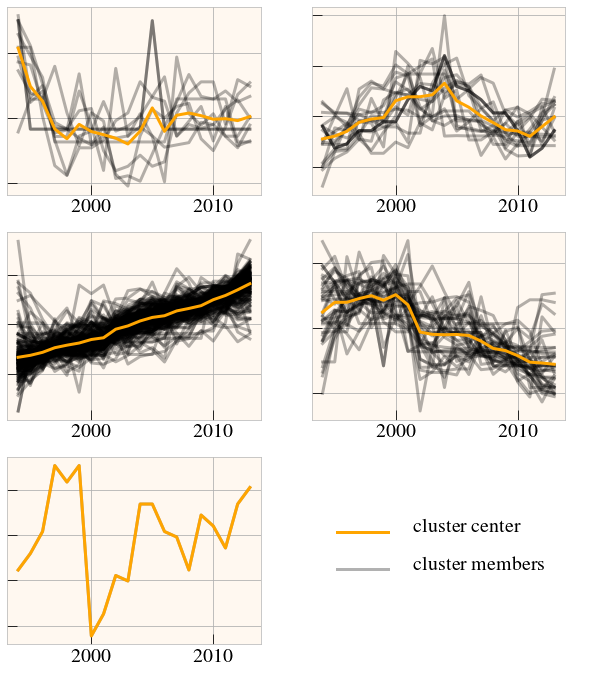

In [19]:
#choosing the same number of clusters as I had in the K-means
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))


def getCentroid(points):
    #print points[:,0], np.nanmean(points[:,0])
    return points.mean(axis=0)


#colorsc3 = get_colors(np.arange(30), pl.cm.blues)
#colors3 = get_colors(labelsag, pl.cm.blues)
for i in labelsag:
    centroidsag[i] = getCentroid(vals[labelsag == i])

fig = pl.figure(figsize=(10, 20))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)

    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color="Orange", lw=3)
    pl.xticks(fontsize=20)
    ax.set_xlim(1993.1, 2013.9)

ax = fig.add_subplot(5, 2, i + 2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.1, 0.3], [0.4, 0.4], 'k-', alpha=0.3)
ax.plot([0.1, 0.3], [0.6, 0.6], '-', color='Orange')
ax.text(0.4, 0.6, "cluster center", fontsize=20)
ax.text(0.4, 0.4, "cluster members", fontsize=20)
tmp = ax.axis('off')

### Figure 4: 
as Figure 2 but for hierarchical agglomerative clustering

In [20]:
for j in range(5):
    print("zipcodes in cluster", j)
    print(cleannyczips[labelsag == j])
    print("\n\n\n\n")

clustersdf = gp.GeoDataFrame()
clustersdf['ZIPCODE'] = cleannyczips
clustersdf['cluster'] = labelsag

('zipcodes in cluster', 0)
[11005 10168 10105 10104 10158 10120 10155 10196 10196 10275]





('zipcodes in cluster', 1)
[10464 10464 10464 10020 10016 10010 10007 11451 10055 10279 10170 10271
 10043 10081 10080 10036 11414 10162]





('zipcodes in cluster', 2)
[11436 11213 11212 11225 11218 11226 11219 11210 11230 11204 10471 10466
 10467 10463 10475 10469 10468 10463 10458 10034 10033 10462 10040 10453
 10465 10461 10457 10460 10032 10452 10456 10472 10031 10039 10459 10451
 10473 10030 10027 10474 10455 10037 10024 10454 10026 10035 10025 11357
 10029 11356 11359 11360 11105 10128 10023 10028 11354 11102 11370 11358
 11362 10044 11369 11103 11106 11368 11377 11355 11101 11364 10018 10001
 10011 11104 11109 11367 10014 10003 11222 10002 11378 10009 10012 11237
 11385 11206 11412 10005 11251 10004 11411 11201 10004 11205 11208 11207
 10004 10004 11413 11217 11238 11231 11422 11420 11417 11215 11231 11232
 11430 11203 11239 11236 11220 10301 10303 11234 10302 11693 11209 10304
 10314

In [21]:
mergednyz_ag = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')

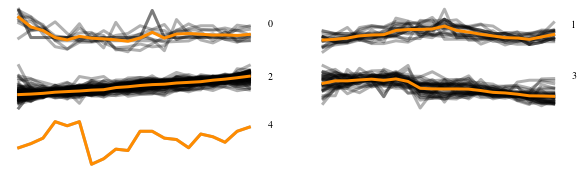

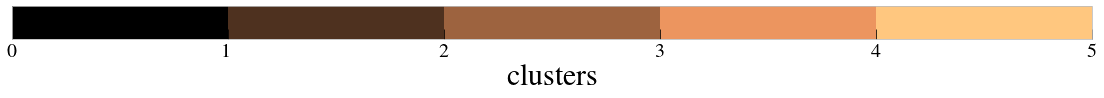

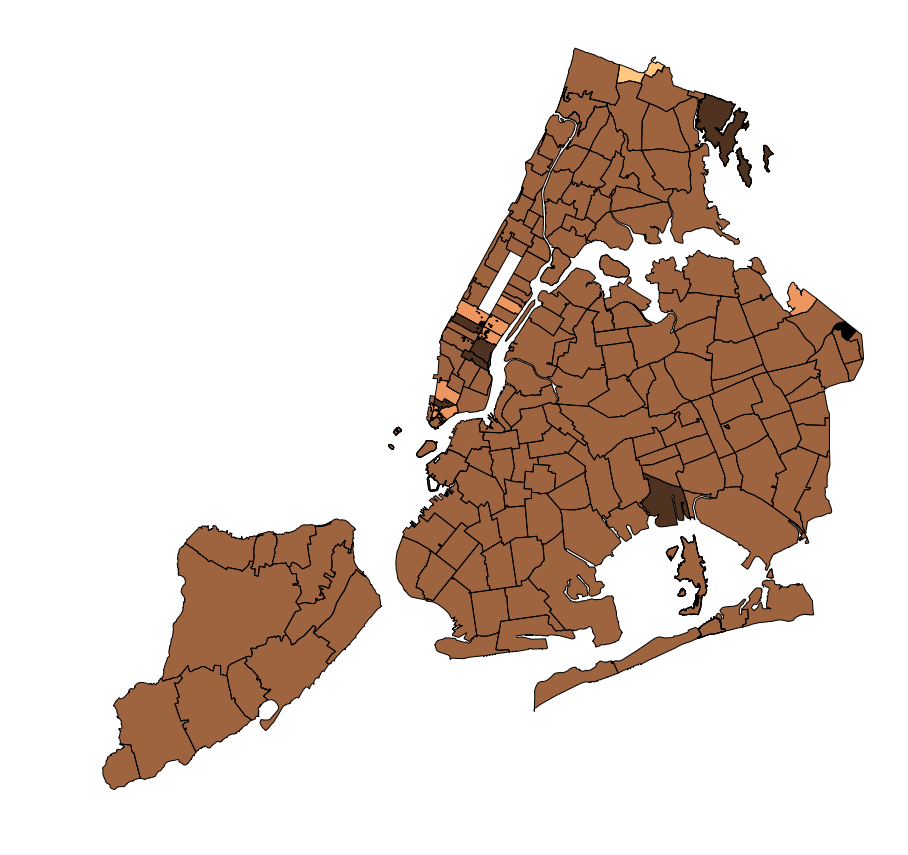

In [22]:
fig = pl.figure(figsize=(10, 5))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    pl.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color='DarkOrange', lw=3)
    pl.grid(False)
    pl.axis('off')
fig = pl.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.copper
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar. 
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = pl.figure(figsize=(15, 15)).add_subplot(111)
mergednyz_ag.plot(column='cluster', colormap=cmap, alpha=1, axes=ax)
tmp = ax.axis('off')

### Figure 5: 
as Figure 4, for hierarchical clustering with 5 clusters

## Comments on agglomerative clustering

with 5 clusters agglomerative clustering finds a cluster of 1, i.e. an outlier (10470 in the Bronx, cluster 4), and a cluster of very few (cluster 0) but does not split the 2 trends of growth as we saw with K-means: the constant grows and the growth that slowed down in recent years. Next I will try to see if increasing the number of clusters these 2 trends are separated. Had I known that i was going to redo the hierarchical clustering I would have used a package (like sklearn clustering) that saves the linkage, or chosen a larger number of clusters to do the linkage and then only picked the 5 cluster level, but the clustering is really not that expensive and on my laptop it takes only a few seconds, so I am going to just redo it)

## Changing the number of clusters

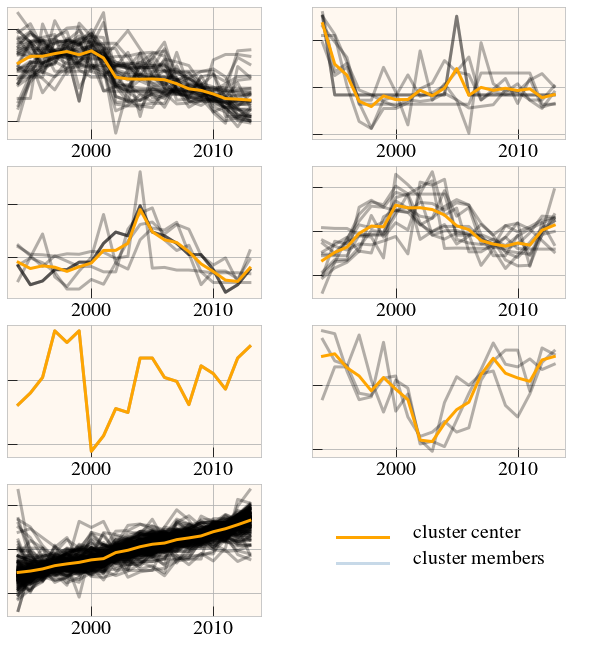

In [23]:
#trying 7 clusters
nc = 7
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

#colorsc3 = get_colors(np.arange(30), pl.cm.blues)
#colors3 = get_colors(labelsag, pl.cm.blues)
for i in labelsag:
    centroidsag[i] = getCentroid(vals[labelsag == i])

fig = pl.figure(figsize=(10, 20))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(7, 2, (i + 1))

    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)

    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color="Orange", lw=3)
    pl.xticks(fontsize=20)
    ax.set_xlim(1993.1, 2013.9)

ax = fig.add_subplot(7, 2, i + 2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.1, 0.3], [0.4, 0.4], '-', alpha=0.3)
ax.plot([0.1, 0.3], [0.6, 0.6], '-', color='Orange')
ax.text(0.4, 0.6, "cluster center", fontsize=20)
ax.text(0.4, 0.4, "cluster members", fontsize=20)
tmp = ax.axis('off')

### Figure 6: 
As figure 2 and 4: time series of business counts in NYC by zipcode, with hierarchical clustering in 7 clusters. 

In [24]:
for j in range(nc):
    print("zipcodes in cluster", j)
    print(cleannyczips[labelsag == j])
    print("\n\n\n\n")

clustersdf = gp.GeoDataFrame()
clustersdf['ZIPCODE'] = cleannyczips
clustersdf['cluster'] = labelsag

('zipcodes in cluster', 0)
[10048 11363 10021 10017 10013 10038 10006 10019 10111 10153 10152 10022
 10281 10165 10118 10176 10122 10107 10103 10166 10169 10172 10270 10110
 10175 10151 10173 10178 10121 10123 10106 10096 10265 10047 10047 10260
 10285]





('zipcodes in cluster', 1)
[11005 10105 10104 10158 10196 10196 10275]





('zipcodes in cluster', 2)
[10464 10464 10464 10055 10043 10081 11414]





('zipcodes in cluster', 3)
[10020 10016 10010 10007 11451 10279 10170 10271 10080 10036 10162]





('zipcodes in cluster', 4)
[10470]





('zipcodes in cluster', 5)
[10168 10120 10155]





('zipcodes in cluster', 6)
[11436 11213 11212 11225 11218 11226 11219 11210 11230 11204 10471 10466
 10467 10463 10475 10469 10468 10463 10458 10034 10033 10462 10040 10453
 10465 10461 10457 10460 10032 10452 10456 10472 10031 10039 10459 10451
 10473 10030 10027 10474 10455 10037 10024 10454 10026 10035 10025 11357
 10029 11356 11359 11360 11105 10128 10023 10028 11354 11102 11370 11358
 1136

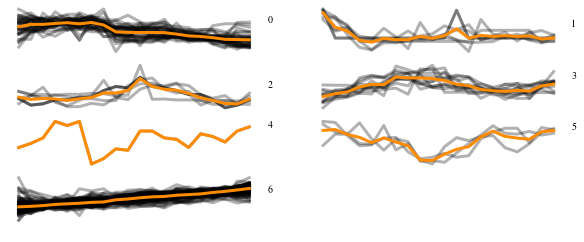

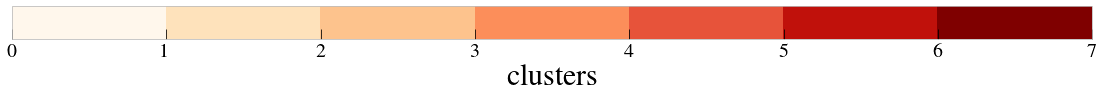

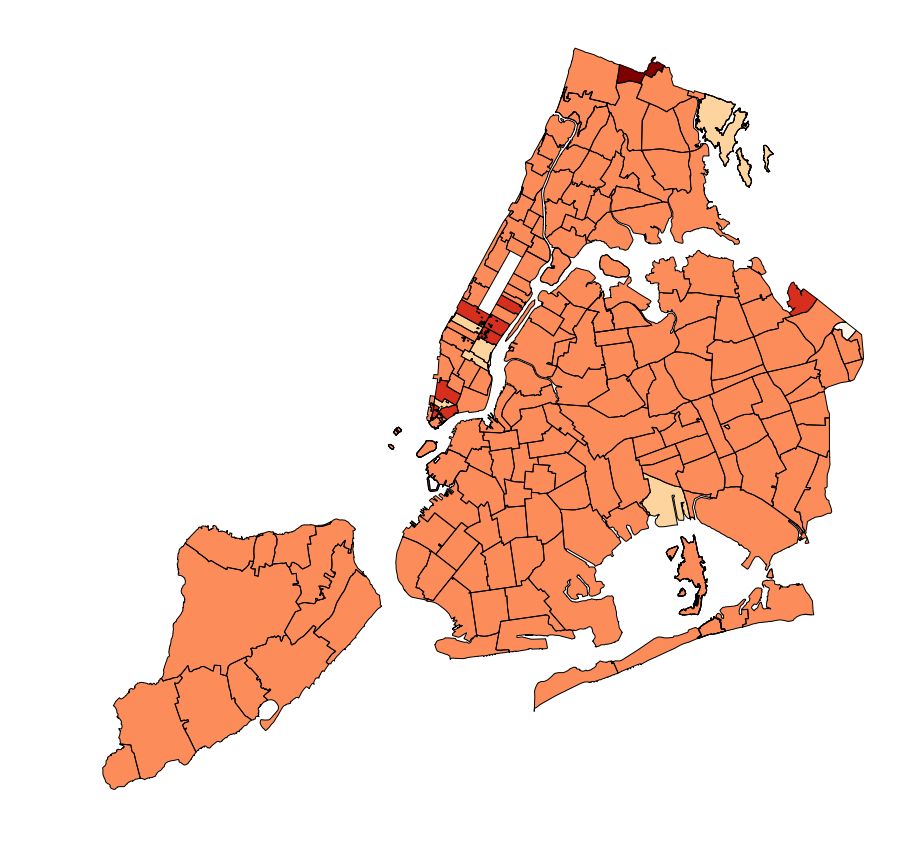

In [25]:
###### mergednyz_ag = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
fig = pl.figure(figsize=(10, 5))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    pl.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color='DarkOrange', lw=3)
    pl.grid(False)
    pl.axis('off')
fig = pl.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.OrRd
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar. 
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = pl.figure(figsize=(15, 15)).add_subplot(111)
mergednyz_ag.plot(column='cluster', colormap=cmap, alpha=1, axes=ax)
tmp = ax.axis('off')

### Figure 7: 
As Figure 5 for 7 clusters

## General comments and conclusions
Increasing the number of clusters isolated a few more outliers, but it did not split the upword trend in a constant growth, and a growth that slowed down in recent years, so I am going to dismiss that and believe that it was not a robust separation.

There is an insteresting cluster (2) that shows a significant injection of establishments in 2005. Interestingly the cluster is not spatially close, but it includes: a large ZIP in the Bronx (10464) a large ZIP in Howard Beach (11414) a midtown one (10055) and two in the financial district. 

11005 10105 10104 10158 10196 10275 are identified by a steep decreas in the first 5 year, which seems robust and significant (by visual inspection of the time sreies). These ZIPs are in Manhattan for the most part, except 1105 in Queens and 10196, which I could not identify (a bug in my code somwehre?) 

10470 remains an outlier. 

With more time, I would inverstigate the economic history of NYC around 2005, and in the second half of the 90s.



## Smoothing the time series before clustering
For now, I just want to make sure the clusters I see are robust to noise. For that I will smooth the time series with a rolling mean filter before clustering. The window size I choose is only 3 years, since I only have 20 datapoints. To avoid NaN's in my data I allow the rolling mean function to return the time series value at the edges (1993, 1994 and 2012, 2013).

In [26]:
#what if i smooth the time series to decrease noise?
cleansmooth = pd.rolling_mean(cleancsb, 3, min_periods=1, axis=1)

vals_smooth = ((cleansmooth.T - cleansmooth.mean(1))/cleansmooth.std(1)).T

print ("I expect means of each row to be = 0", vals_smooth.mean(1)[:10])
print ("I expect standard deviations of each row to be = 1", vals_smooth.std(1)[:10])


('I expect means of each row to be = 0', array([  6.55031585e-16,  -3.99680289e-16,  -6.66133815e-16,
         4.21884749e-16,  -1.16573418e-15,   1.33226763e-16,
        -1.48769885e-15,  -1.08801856e-15,   5.55111512e-17,
         5.44009282e-16]))
('I expect standard deviations of each row to be = 1', array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app


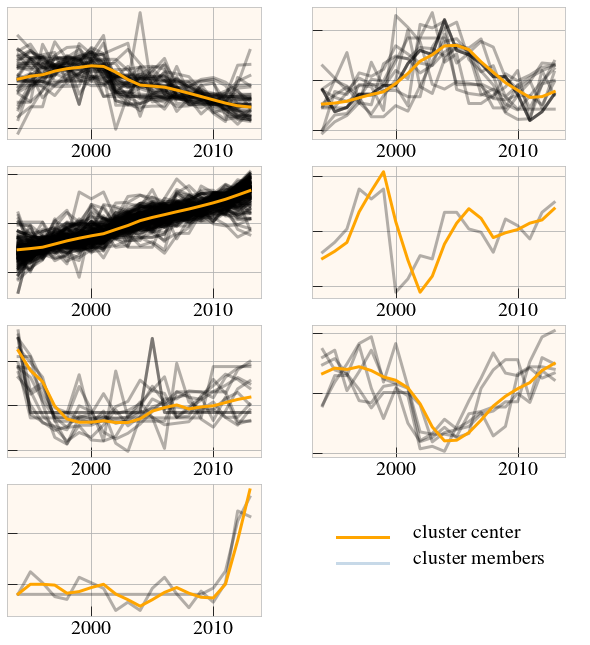

In [27]:
nc = 7
agc = AgglomerativeClustering(
    n_clusters=nc, linkage='average').fit(vals_smooth)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals_smooth.shape[1]))

#colorsc3 = get_colors(np.arange(30), pl.cm.blues)
#colors3 = get_colors(labelsag, pl.cm.blues)
for i in labelsag:
    centroidsag[i] = getCentroid(vals_smooth[labelsag == i])

fig = pl.figure(figsize=(10, 20))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(7, 2, (i + 1))
    #notice i plot the original time series, not the smooth ones    
    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)

    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color="Orange", lw=3)
    pl.xticks(fontsize=20)
    ax.set_xlim(1993.1, 2013.9)

ax = fig.add_subplot(7, 2, i + 2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.1, 0.3], [0.4, 0.4], '-', alpha=0.3)
ax.plot([0.1, 0.3], [0.6, 0.6], '-', color='Orange')
ax.text(0.4, 0.6, "cluster center", fontsize=20)
ax.text(0.4, 0.4, "cluster members", fontsize=20)
tmp = ax.axis('off')

### Figure 9: 
As Figure  2, 4, 6 but for smoothed time series 

In [28]:
for j in range(nc):
    print("zipcodes in cluster", j)
    print(cleannyczips[labelsag == j])
    print("\n\n\n\n")

clustersdf = gp.GeoDataFrame()
clustersdf['ZIPCODE'] = cleannyczips
clustersdf['cluster'] = labelsag

('zipcodes in cluster', 0)
[10048 11363 10021 10017 10010 10013 10038 10006 10019 10111 10152 10022
 10281 10165 10118 10176 10170 10122 10107 10103 10166 10169 10270 10271
 10110 10175 10151 10173 10178 10121 10123 10106 10043 10096 10265 10047
 10047 10080 10260 10285]





('zipcodes in cluster', 1)
[10464 10464 10464 10020 10016 10007 11451 10055 10279 10081 10036 11414
 10162]





('zipcodes in cluster', 2)
[11436 11213 11212 11225 11218 11226 11219 11210 11230 11204 10466 10467
 10463 10475 10469 10468 10463 10458 10034 10033 10462 10040 10453 10465
 10461 10457 10460 10032 10452 10456 10472 10031 10039 10459 10451 10473
 10030 10027 10474 10455 10037 10024 10454 10026 10035 10025 11357 10029
 11356 11359 11360 11105 10128 10023 10028 11354 11102 11370 11358 11362
 10044 11369 11103 11106 11368 11377 11355 11101 11364 10018 10001 10011
 11104 11109 11367 10014 10003 11222 10002 11378 10009 10012 11237 11385
 11206 11412 10005 11251 10004 11411 11201 10004 11205 11208 11207 10004

(905410.75604293647,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395504)

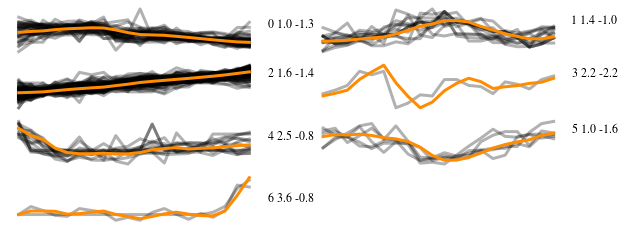

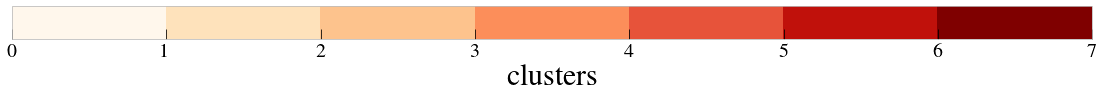

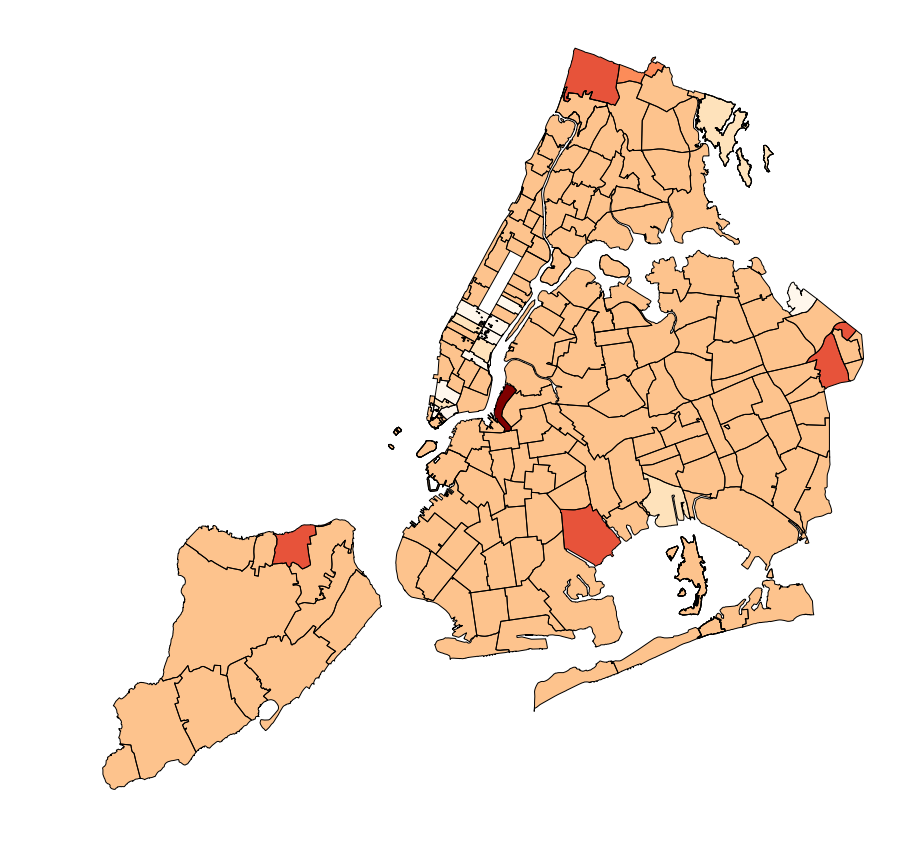

In [29]:
mergednyz_ag = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
fig = pl.figure(figsize=(10, 5))
for i, Xc in enumerate(centroidsag):
    ax = fig.add_subplot(5, 2, (i + 1))
    #notice i plot the original time series, not the smooth ones
    for v in vals[labelsag == i]:
        ax.plot(np.arange(1994, 2014, 1), v, 'k-', alpha=0.3)

    pl.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2014, 1), Xc, color='DarkOrange', lw=3)
    ax.text(2014.5, 1, "%d %.1f %.1f" % (i, max(Xc), min(Xc)), fontsize=12)
    pl.grid(False)
    pl.axis('off')
fig = pl.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.OrRd
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar. 
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = pl.figure(figsize=(15, 15)).add_subplot(111)
mergednyz_ag.plot(column='cluster', colormap=cmap, alpha=1, axes=ax)
ax.axis('off')

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# Conclusions:

1) most of the city has been in constant economic growth, as measured by the number of establishments, since 1994 (cluster 4, with a mean slope of 0.2)

2) a significant fraction of zip codes suffered a slow down, since 2000 (cluster 0) mostly these are zips in Manhattan midtown and financial district, and a single zip code in queens: 11363.

3) zip code 10470, in the bronx, seems to have a different behavior than any other NYC zips. A quick google search shows that it is an upscale zip code in the Bronx (identified in some web sites as the best place to live in the Bronx), so a reasonable outlier.

4) interesting patterns that should be investigated include the initial economic decline of individual zips distributed in the various boroughs (Queens, Bronx, SI), the economic injections in 2005 for a few zip codes in Queens and midtown.

The metric of economic growth, the number of establishments, is partial and biased (toward small business) and its validity should be investigated.

Lastly, since the dataset is small (N~200) we can plot a full dendrogram and see the hierarchical structure. 
